In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

filepath="../data_raw/Expenditure_by_GDP.csv"
data=pd.read_csv(filepath)
data.head()


,Reference Area,Time Period,Sex,Age group,Units of measurement,Observation Value
0,Afghanistan,2014,Not applicable,Not applicable,Percent,4.80435
1,Afghanistan,2013,Not applicable,Not applicable,Percent,4.54436
2,Afghanistan,2012,Not applicable,Not applicable,Percent,3.12562
3,Afghanistan,2011,Not applicable,Not applicable,Percent,4.08791
4,Afghanistan,2010,Not applicable,Not applicable,Percent,4.51116


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3195 entries, 0 to 3194
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Reference Area        3195 non-null   object 
 1   Time Period           3195 non-null   int64  
 2   Sex                   3195 non-null   object 
 3   Age group             3195 non-null   object 
 4   Units of measurement  3195 non-null   object 
 5   Observation Value     3195 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 149.9+ KB


In [3]:
data.columns=data.columns.str.strip().str.lower().str.replace(" ","_")
data = data.drop_duplicates()

In [4]:
data["reference_area"].unique()[:10]  # show first 10 country names

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba'],
      dtype=object)

In [5]:
data=data.dropna(subset=["observation_value"])
data=data.drop_duplicates()

In [9]:
clean_path = "../data_clean/educationexp_by_GDP_clean.csv"
data.to_csv(clean_path, index=False)
print(f" Cleaned data saved to: {clean_path}")


 Cleaned data saved to: ../data_clean/educationexp_by_GDP_clean.csv


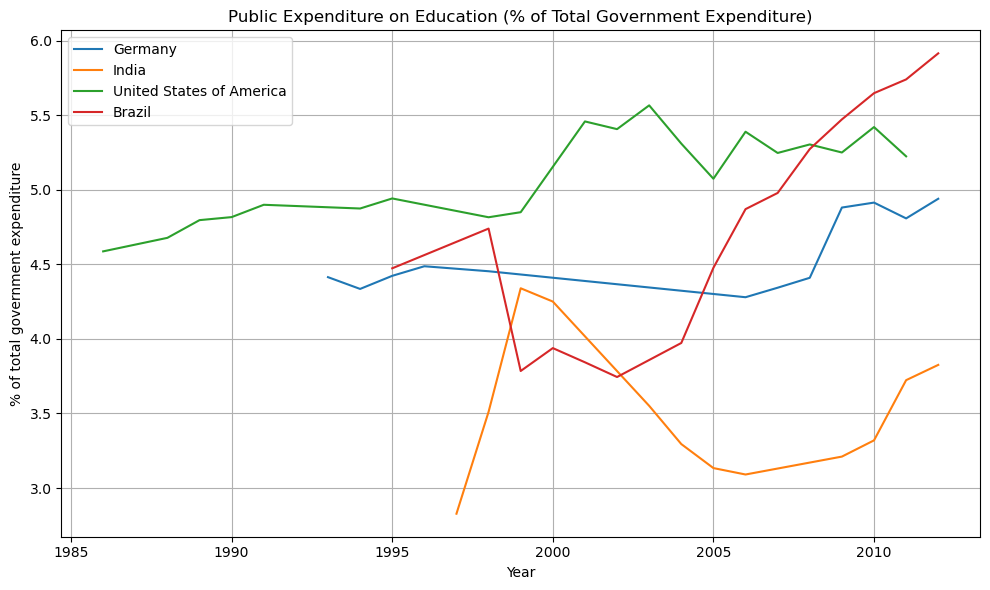

In [6]:
countries = ["Germany", "India", "United States of America", "Brazil"]

plt.figure(figsize=(10,6))
for c in countries:
    subset = data[data["reference_area"] == c]
    plt.plot(subset["time_period"], subset["observation_value"], label=c)

plt.title("Public Expenditure on Education (% of Total Government Expenditure)")
plt.xlabel("Year")
plt.ylabel("% of total government expenditure")
plt.legend()
plt.tight_layout()
plt.grid(True)

plt.show()

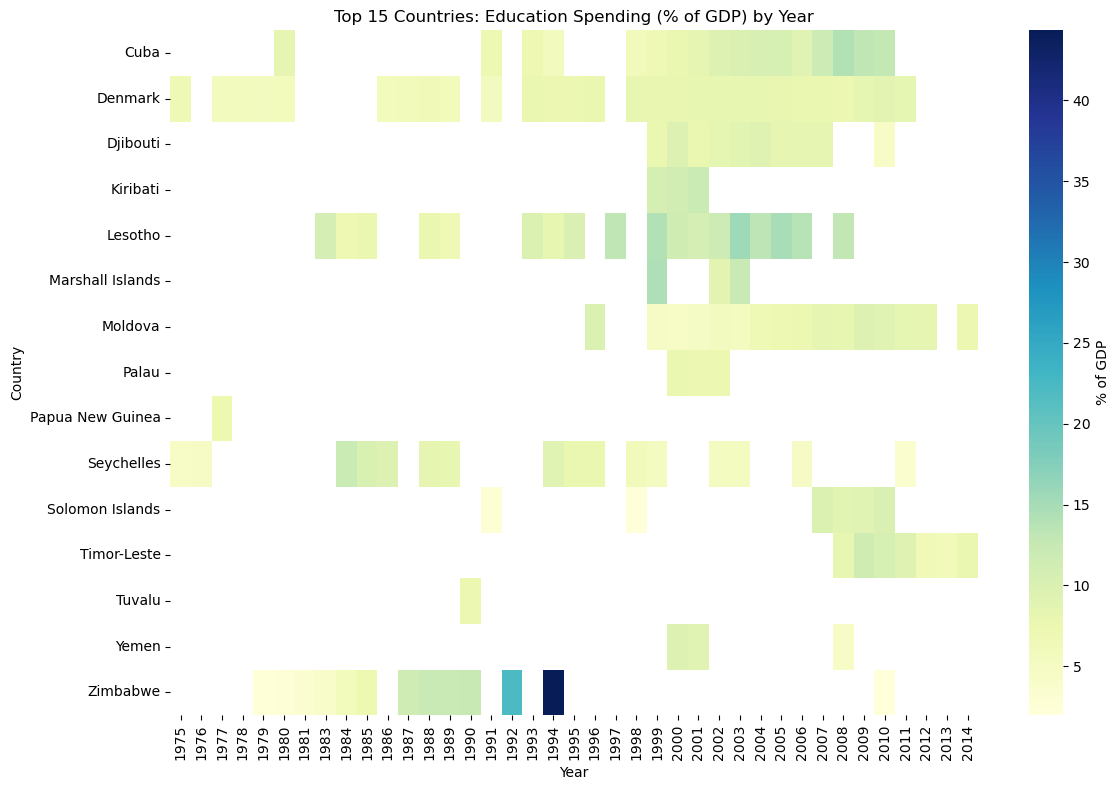

In [22]:
# Filter to top 15 countries by average spending
top_countries = (
    data.groupby("reference_area")["observation_value"]
    .mean()
    .nlargest(15)
    .index
)

# Keep only those countries
subset = data[data["reference_area"].isin(top_countries)]

# Pivot for heatmap
pivot = subset.pivot_table(
    index="reference_area", columns="time_period", values="observation_value"
)

# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(pivot, cmap="YlGnBu", cbar_kws={'label': '% of GDP'})
plt.title("Top 15 Countries: Education Spending (% of GDP) by Year")
plt.xlabel("Year")
plt.ylabel("Country")
plt.tight_layout()
plt.show()



In [23]:
mean_values = (
    data.groupby("reference_area")["observation_value"]
    .mean()
    .sort_values(ascending=False)
)
print(mean_values.head(10))


reference_area
Marshall Islands    11.816303
Kiribati            11.253783
Lesotho             11.123614
Zimbabwe            10.993835
Cuba                 9.324694
Timor-Leste          8.497783
Djibouti             8.123817
Yemen                7.822313
Palau                7.605517
Tuvalu               7.554180
Name: observation_value, dtype: float64
